**Ященко Семён РК6-61Б**

**Задание:** Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия. Сформулировать критерий "устойчивости" биологической системы на основе численности особей на произвольно заданном интервале моделирования. Отыскать экстремум предложенного критерия как функции 4-х параметров модели.

Система Лотки-Вольтерры является первоначальной и простейшей системой для описания модели «хищник-жертва», то есть популяции хищников и популяции жертв, взаимодействующих в какой-то среде: жертвы едят растительность, хищники — жертв:

dx/dt = (𝛼 - 𝛽y)x;

dy/dt = (-𝛾 + 𝛿x)y;

где
* x — численность жертв (травоядных);
* y — численность хищников;
* 𝛼 — вероятность того, что травоядные размножатся;
* 𝛽 — вероятность того, что травоядное будет съедено хищником;
* 𝛾 — вероятность того, что хищник умрет от голода;
* 𝛿 — вероятность того, что хищнику хватит еды на дальнейшее размножение.

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve, minimize
import math

In [61]:
class Biome(object):

    def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
        self._dt = dt
        self._n_iters = int(tmax / dt)
        # Intial state
        self.pred_init = pred_init
        self.prey_init = prey_init
        # Data arrays
        self.time = None
        self.prey = None
        self.pred = None

    def run(self, alpha, beta, delta, gamma):
        """
        Simulation settings:
            alpha - prey growth
            beta - prey mortality
            delta - predator growrh
            gamma - predator mortality
        """
        self.time = np.zeros(self._n_iters)
        self.prey = np.zeros(self._n_iters)
        self.pred = np.zeros(self._n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        # Lotka-Volterra equations
        for i in range(self._n_iters - 1):
            self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
            self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
        return self.time, self.prey, self.pred

    def plot(self):
        plt.xlabel('время')
        plt.ylabel('кол-во')
        plt.plot(self.time, self.pred, label='хищники', color='red')
        plt.plot(self.time, self.prey, label='жертвы', color='green')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_cycle(self):
        plt.xlabel('число хищников')
        plt.ylabel('число жертв')
        plt.plot(self.pred, self.prey, color='black')
        plt.grid()
        plt.show()


**Критерий устойчивости** - определение того, какое состояние системы является устойчивым. 

Предположим, что на грани вымирания видов отношение численности травоядных к численности хищников будет равно 1.4

In [62]:
criter = 1.4

def solve(numbers):
    alpha, beta, gamma, delta = numbers 
    x_0 = 1
    y_0 = 1
    # стационарная позиция системы: 
    x_const = gamma / delta
    y_const = alpha / beta
    
    # выражаем значение константы из математической модели Лотки-Вольтерры:
    c = beta * y_0 + delta * x_0 - alpha * np.log(np.abs(y_0)) - gamma * np.log(np.abs(x_0))
    
    def count_x(x):
        return beta * y_const + delta * x - alpha * np.log(np.abs(y_const)) - gamma * np.log(np.abs(x)) - c
    def count_y(y):
        return beta * y + delta * x_const - alpha * np.log(np.abs(y)) - gamma * np.log(np.abs(x_const)) - c

    # минимальая популяция жертв и хищников (пик вымирания):
    x_min = fsolve(count_x, 0.001)
    y_min = fsolve(count_y, 0.001)
    
    return np.abs(y_min / x_min - criter)

Рассчитанные параметры системы:
alpha = 2.10684929912935
beta  = 1.7845303810507616
gamma = 1.8931507026495429
delta = 2.2154696183088176


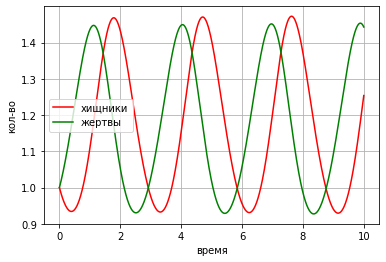

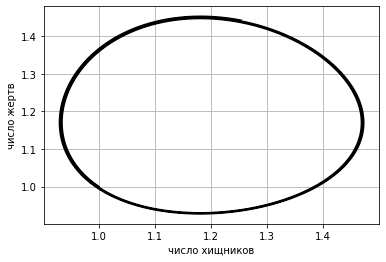

In [63]:
def main():
    parametrs = minimize(solve, [2,2,2,2])
    alpha, beta, gamma, delta = parametrs.x
    print ("Рассчитанные параметры системы:")
    print("alpha = {}".format(alpha))
    print("beta  = {}".format(beta))
    print("gamma = {}".format(gamma))
    print("delta = {}".format(delta))
    biome = Biome(pred_init=1, prey_init=1, tmax = 10, dt = 0.001)
    biome.run(alpha, beta, gamma, delta)
    biome.plot()
    biome.plot_cycle()

if __name__ == "__main__":
    main()

Численности популяций хищников и жертв совершают рассогласованные по фазе автоколебания. Такое поведение часто наблюдается в природе.

Стоит отметить, что в данной модели принимаются несколько допущений:
* Количество пищи для травоядных не ограничено;
* Ни жертвы, ни хищники не эмигрируют из среды;
* Никакие другие животные не мигрируют в среду;
* Данная модель не учитывает вымирание животных по причине старения и прочих внешних воздействий.

Поскольку в реальных популяциях присутствует много возмущающих факторов, не учтенных в модели Лотки — Вольтерры, эта модель вряд ли может претендовать на адекватное описание реальности.